# Loading the Data


In [83]:
import pandas as pd

In [84]:
train = pd.read_csv('Train.csv')
print(train.shape)
train.head()

(21454, 19)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In train, we have a set of inputs (like 'urban_or_rural' or 'ghsl_water_surface') and our desired output variable, 'Target'. There are 21454 rows - lots of juicy data!

In [85]:
test = pd.read_csv('Test.csv')
print(test.shape)
test.head()

(7194, 18)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


Test looks just like train but without the 'Target' column and with fewer rows.

In [86]:
ss = pd.read_csv('SampleSubmission.csv')
print(ss.shape)
ss.head()

(7194, 2)


,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


The sample submission is just the ID column from test with a 'Target' column where we will put out predictions.

Now that we have the data loaded, we can start exploring.

# EDA

We will explore some trends in the data and look for any anomalies such as missing data. A few examples are done here but you can explore much further yourself and get to know the data better.

First up: let's see how an input like 'nighttime lights' relates to the target column:

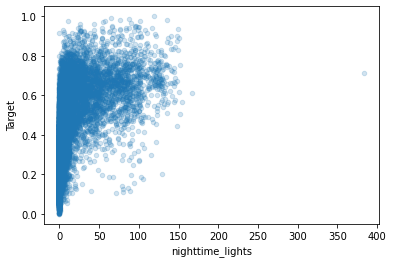

In [87]:
# Plotting the relationship between an input column and the target
train.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)

As you might have guessed, places that emit more light tend to be wealthier, but there is a lot of variation.

We can also look at categorical columns like 'country' or 'urban_vs_rural' and see the distribution of the target for each group:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


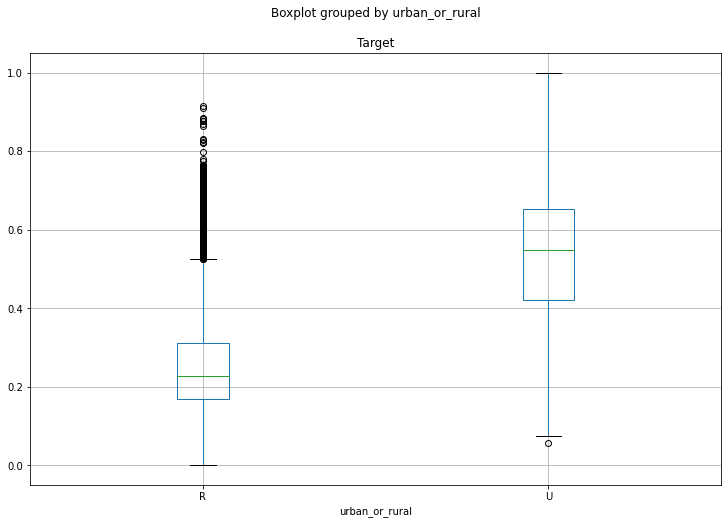

In [89]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))

Again, not unexpected. Rural areas tend to be less wealthy than urban areas.

Now the scary question: do we have missing data to deal with?

In [91]:
train.isna().sum() # Hooray - no missing data!

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

I did very little analysis due to time 😕
(I'll review)



# Modelling



In [93]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


In [94]:
# Turning a categorical column into a numeric feature
train['is_urban'] = (train['urban_or_rural'] == 'U').astype(int)
test['is_urban'] = (test['urban_or_rural'] == 'U').astype(int)
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target,is_urban
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783,0
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898,0
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320,0
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107,0
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328,1


In [95]:
in_cols.append('is_urban') # Adding the new features to our list of input columns

In [96]:
from sklearn.model_selection import train_test_split

#X, y = train[in_cols], train['Target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58) # Random state keeps the split consistent
#print(X_train.shape, X_test.shape)

In [97]:
# Replace this with your chosen method for evaluating a model:
X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

In [28]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [29]:
from sklearn import metrics

I'll try all the regressor models i know 🙂

**note to self**:: research on other factors behind model selection 😀

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor 
import lightgbm as lgb

In [98]:
#Creating model2
rnfreg2_model = RandomForestRegressor()
linearreg2_model = LinearRegression()
knnreg2_model = KNeighborsRegressor()
dtreg2_model = DecisionTreeRegressor()
svrreg_model = SVR()
xgbreg2_model = XGBRegressor()
ctb_model = CatBoostRegressor()
gbreg_model = GradientBoostingRegressor()
abreg_model = AdaBoostRegressor()
breg_model = BaggingRegressor()
lgbm = lgb.LGBMRegressor()

#training model
rnfreg2_model.fit(X_train, y_train) 
linearreg2_model.fit(X_train, y_train)
knnreg2_model.fit(X_train, y_train)
dtreg2_model.fit(X_train, y_train)
svrreg_model.fit(X_train, y_train)
xgbreg2_model.fit(X_train, y_train) 
ctb_model.fit(X_train, y_train) 
gbreg_model.fit(X_train, y_train) 
abreg_model.fit(X_train, y_train) 
breg_model.fit(X_train, y_train) 
lgbm.fit(X_train, y_train) 

[10:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.064157
0:	learn: 0.1859714	total: 9.35ms	remaining: 9.34s
1:	learn: 0.1791627	total: 15.9ms	remaining: 7.95s
2:	learn: 0.1725386	total: 22.5ms	remaining: 7.49s
3:	learn: 0.1667288	total: 29.2ms	remaining: 7.26s
4:	learn: 0.1612676	total: 35.7ms	remaining: 7.1s
5:	learn: 0.1563665	total: 42.1ms	remaining: 6.97s
6:	learn: 0.1520623	total: 48.6ms	remaining: 6.9s
7:	learn: 0.1479933	total: 55.6ms	remaining: 6.89s
8:	learn: 0.1441141	total: 62.6ms	remaining: 6.89s
9:	learn: 0.1406129	total: 69ms	remaining: 6.83s
10:	learn: 0.1374949	total: 75.6ms	remaining: 6.8s
11:	learn: 0.1346764	total: 82.2ms	remaining: 6.77s
12:	learn: 0.1322909	total: 88.9ms	remaining: 6.75s
13:	learn: 0.1300070	total: 95.9ms	remaining: 6.75s
14:	learn: 0.1280207	total: 102ms	remaining: 6.73s
15:	learn: 0.1261081	total: 109ms	remaining: 6.71s
16:	learn: 0.1244366	total: 

LGBMRegressor()

In [99]:
from sklearn.metrics import mean_squared_error

# The `squared=False` bit tells this function to return the ROOT mean squared error
print('RandomForestRegressor: ', mean_squared_error(y_test, rnfreg2_model.predict(X_test), squared=False))
print('LinearRegression: ', mean_squared_error(y_test, linearreg2_model.predict(X_test), squared=False))
print('KNeighborsRegressor: ', mean_squared_error(y_test, knnreg2_model.predict(X_test), squared=False))
print('DecisionTreeRegressor: ', mean_squared_error(y_test, dtreg2_model.predict(X_test), squared=False))
print('SVR: ', mean_squared_error(y_test, svrreg_model.predict(X_test), squared=False))
print('XGBRegressor: ', mean_squared_error(y_test, xgbreg2_model.predict(X_test), squared=False))
print('CatBoostRegressor: ', mean_squared_error(y_test, ctb_model.predict(X_test), squared=False))
print('GradientBoostingRegressor: ', mean_squared_error(y_test, gbreg_model.predict(X_test), squared=False))
print('AdaBoostRegressor: ', mean_squared_error(y_test, abreg_model.predict(X_test), squared=False))
print('BaggingRegressor: ', mean_squared_error(y_test, breg_model.predict(X_test), squared=False))
print('LGBMRegressor: ', mean_squared_error(y_test, lgbm.predict(X_test), squared=False))

RandomForestRegressor:  0.10460361610727878
LinearRegression:  0.12470393248132576
KNeighborsRegressor:  0.12235559943072993
DecisionTreeRegressor:  0.14256321249422385
SVR:  0.12450772732784653
XGBRegressor:  0.10814399709626722
CatBoostRegressor:  0.10246370491199926
GradientBoostingRegressor:  0.10834925162135588
AdaBoostRegressor:  0.12801996281744693
BaggingRegressor:  0.10846130221090762
LGBMRegressor:  0.10414139366194143


##**model tuning**

a) random forest

In [100]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_squared_error(y_test, model.predict(X_test), squared=False))

3 0.10438589222756224
5 0.10452017042201567
8 0.10422902733340351
10 0.1043801468524455
14 0.10416581813198542
18 0.10410261106072162


b) xgb

In [101]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()

# Define hyperparameters
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 10, 15],
              'min_child_weight': [4, 8, 12],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

# Grid search object
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
0.713764203271064
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 12, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


# Submission


In [ ]:
# Fit a model on the whole training set, using our best parameters
rf = RandomForestRegressor(max_depth=18)
rf.fit(X_train, y_train)

In [ ]:
# Fit a model on the whole training set, using our best parameters
xgb = XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=5,min_child_weight=12,n_estimators=500,nthread= 4,silent=1,subsample=0.7)
xgb.fit(X_train, y_train)


In [ ]:
# Copying our desired predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = gbreg_model.predict(test[in_cols]) 
ss.head()

In [108]:
ss.to_csv('gbreg.csv', index=False)